****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
from pandas.io.json import json_normalize

## Find the 10 countries with the most projects

In [2]:
#reading json data in from file into dataframe
df = pd.read_json('data/world_bank_projects.json')

In [3]:
# Top 10 Countries with the Most Projects
# Calculated by taking the value counts of the each country supplied in the file
df.countryshortname.value_counts()[:10]

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Morocco               12
Bangladesh            12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

Text(0.5, 1.0, 'Countries with Most Projects')

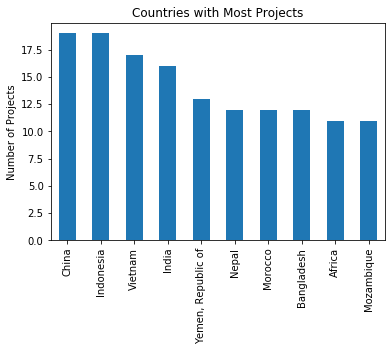

In [4]:
# Visualization of data in cell above
df.countryshortname.value_counts()[:10].plot(kind='bar')
plt.ylabel('Number of Projects')
plt.title('Countries with Most Projects')

## Find the top 10 major project themes

In [5]:
# reading json data in directly so that json_normalize can be used on column of interest
with open('data/world_bank_projects.json') as data_file:
    data = json.load(data_file)

In [6]:
# creating dataframe from normalized 'mjtheme_namecode' column
df_theme = json_normalize(data, 'mjtheme_namecode')

In [7]:
# for a scalable solution to filling in missing names I needed to create a dictionary of codes and corresponding names
df_for_dict = df_theme.replace(r'^\s*$', np.nan, regex=True).dropna() # replaces empty string columns with NaN, then drops all NaN containing rows
code_dict = pd.Series(df_for_dict.name.values, index=df_for_dict.code).to_dict() # creates dictionary from code number and corresponding name

In [8]:
# mapping the dictionary to the 'code' column translates the codes into their English counterparts in new column
df_theme['theme_completed'] = df_theme['code'].map(code_dict)
df_missing_names_filled = df_theme.drop('name',axis=1) # dropped original name column for dataframe readability
df_missing_names_filled

,code,theme_completed
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [9]:
# Top Ten Major Project Themes
# again, value counts were used to calculate the top 10, this will give a correct answer at this step since the missing names have been filled
df_missing_names_filled.theme_completed.value_counts()[:10]

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: theme_completed, dtype: int64

Text(0.5, 1.0, 'Top Ten Major Project Themes')

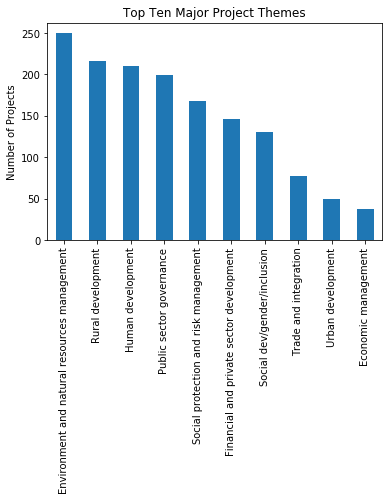

In [10]:
# visualization of data in cell above
df_missing_names_filled.theme_completed.value_counts()[:10].plot(kind='bar')
plt.ylabel('Number of Projects')
plt.title('Top Ten Major Project Themes')